In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install basics

ERROR: Could not find a version that satisfies the requirement basics
ERROR: No matching distribution found for basics
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install raceplotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

/Users/rishusingh/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [6]:
df1 = pd.read_csv("trends.csv")

In [7]:
# improvising graph display
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [8]:
# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
df1

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
...,...,...,...,...,...
26950,Vietnam,2020,Là Gì?,1,Virus Corona là gì
26951,Vietnam,2020,Là Gì?,2,Miễn thị thực là gì
26952,Vietnam,2020,Là Gì?,3,Đầu cắt moi là gì
26953,Vietnam,2020,Là Gì?,4,Bệnh bạch hầu là gì


In [10]:
len(df1["category"].unique())

2450

In [11]:
cat1 = df1["category"].unique()
print(cat1)

['Consumer Brands' 'Men' 'Movies' ... 'Cách Làm' 'Như Thế Nào?' 'Là Gì?']


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


We can see there are no 'null' values and hence data is clean

In [13]:
df1["category"] = df1["category"].replace(['Películas'],'Movies')
df1

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
...,...,...,...,...,...
26950,Vietnam,2020,Là Gì?,1,Virus Corona là gì
26951,Vietnam,2020,Là Gì?,2,Miễn thị thực là gì
26952,Vietnam,2020,Là Gì?,3,Đầu cắt moi là gì
26953,Vietnam,2020,Là Gì?,4,Bệnh bạch hầu là gì


In [14]:
print(Counter(df1["category"]).most_common(10))
top10 = Counter(df1["category"]).most_common(7)
top_cat = []
for cat in top10:
    top_cat.append(cat)


dict_cat = {}
for i,j in top_cat:
    dict_cat[i] = j
x,y = zip(*top_cat)



[('People', 760), ('Searches', 620), ('Movies', 580), ('TV Shows', 305), ('Songs', 215), ('Recipes', 175), ('What is...?', 175), ('How to...', 170), ('News', 150), ('Athletes', 125)]


In [15]:
df = df1[df1['category'].isin(x)]

In [16]:
df['category_freq'] = df['category'].map(dict_cat)

<ipython-input-16-3886aaba434f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_freq'] = df['category'].map(dict_cat)


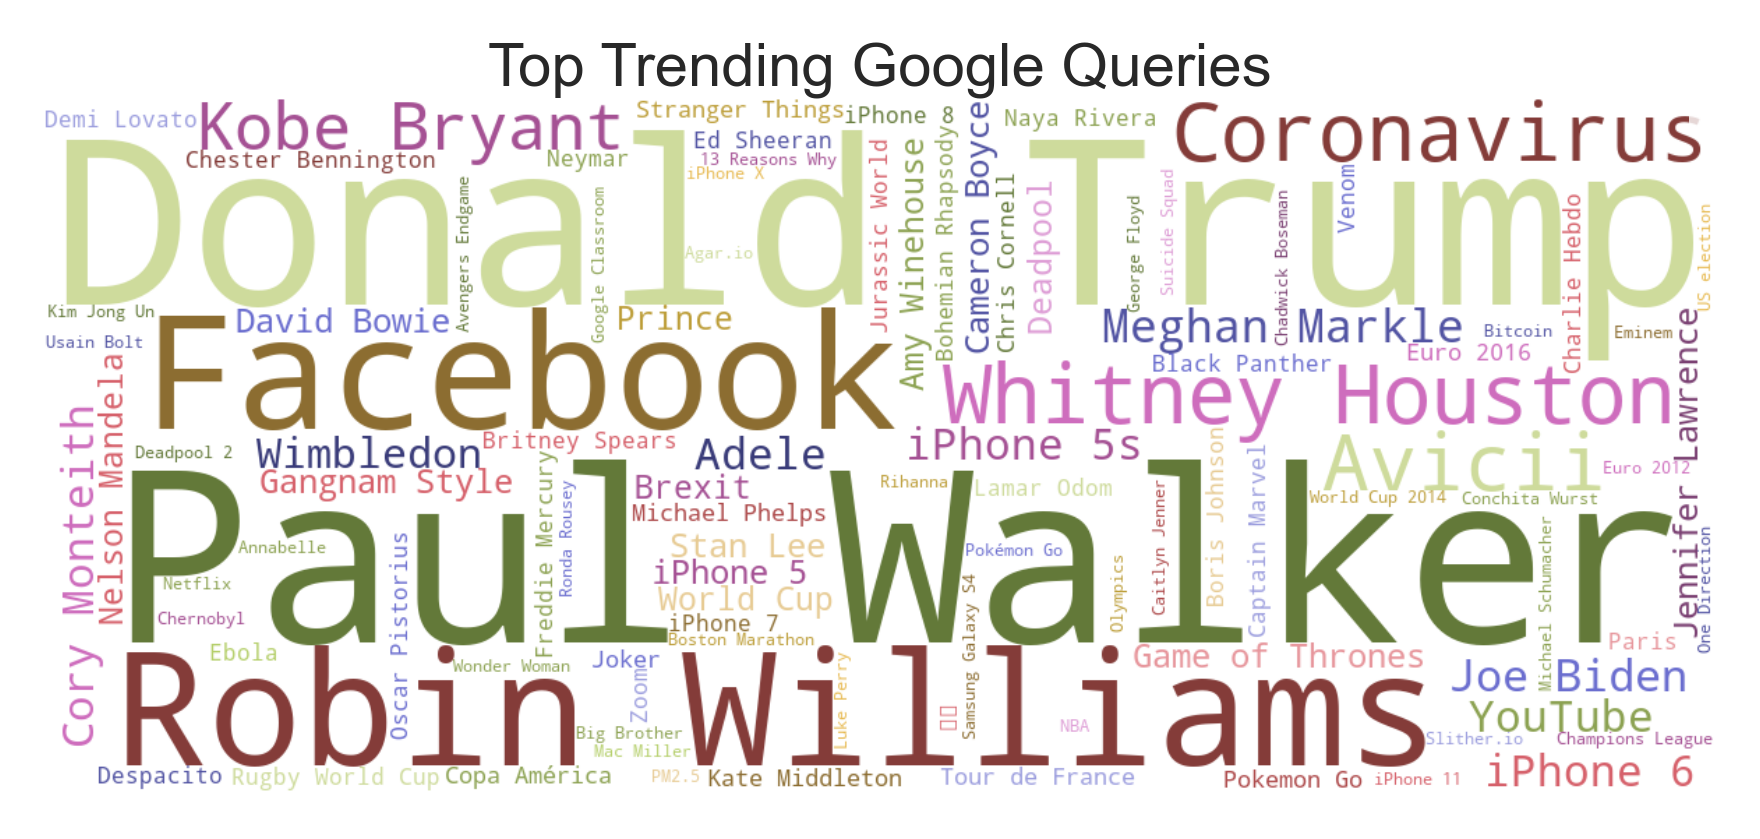

In [17]:
import wordcloud
wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(df1["query"]).most_common(100)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.legend(df["category"], loc=0)
plt.title("Top Trending Google Queries" , fontsize = 30)
_ = plt.axis("off")

In [18]:
import random

color_list = ['magenta',"lightgreen", "slateblue", "orange","black",  "crimson","darkkhaki"]
x,y = zip(*top_cat)

cc = {}
for i in range(len(x)):
    key = x[i]
    val = color_list[i]
    cc[key] = val
print(cc)
#generate same random colors for each category
# for color in color_list:  
# df['color'] = df.groupby('category')['category'].transform(lambda x: random.choice(color_list))

df['color'] = df['category'].replace(cc)

print(df)



{'People': 'magenta', 'Searches': 'lightgreen', 'Movies': 'slateblue', 'TV Shows': 'orange', 'Songs': 'black', 'Recipes': 'crimson', 'What is...?': 'darkkhaki'}
            location  year category  rank                     query  \
10            Global  2001   Movies     1              Harry Potter   
11            Global  2001   Movies     2         Lord of the Rings   
12            Global  2001   Movies     3             Final Fantasy   
13            Global  2001   Movies     4               Tomb Raider   
14            Global  2001   Movies     5                     Shrek   
...              ...   ...      ...   ...                       ...   
26845  United States  2020   Movies     1  Las píldoras de mi novio   
26846  United States  2020   Movies     2         Sonic la película   
26847  United States  2020   Movies     3                   365 Dni   
26848  United States  2020   Movies     4                 La cabaña   
26849  United States  2020   Movies     5          Ya no e

<ipython-input-18-70ea49fc3ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['category'].replace(cc)


In [19]:
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


In [20]:
for i in color_list:
    print(mpl.colors.is_color_like(i))
# print(mpl.colors.is_color_like('Lightcoral'))   

True
True
True
True
True
True
True


In [21]:
import wordcloud
#create a dict of colors and category
color_to_words =df.groupby('color')['category'].agg(list).to_dict()

cat = df['category']


# word_cloud_dict = Counter(word_ls)
cat_cloud = Counter(cat)

# Creating word_cloud with text as argument in .generate() method
# wordcloud = wordcloud.WordCloud(width=1200, height=500,collocations=False, background_color="white",max_words=100, mask=mask).generate_from_frequencies(word_cloud_dict)
wc = wordcloud.WordCloud(width=1200, height=500,collocations=False, background_color="white",max_words=100).generate_from_frequencies(cat_cloud)

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'


<ipython-input-22-19a5ca8fbe2d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(x, rotation='vertical')


<Figure size 1080x7200 with 0 Axes>

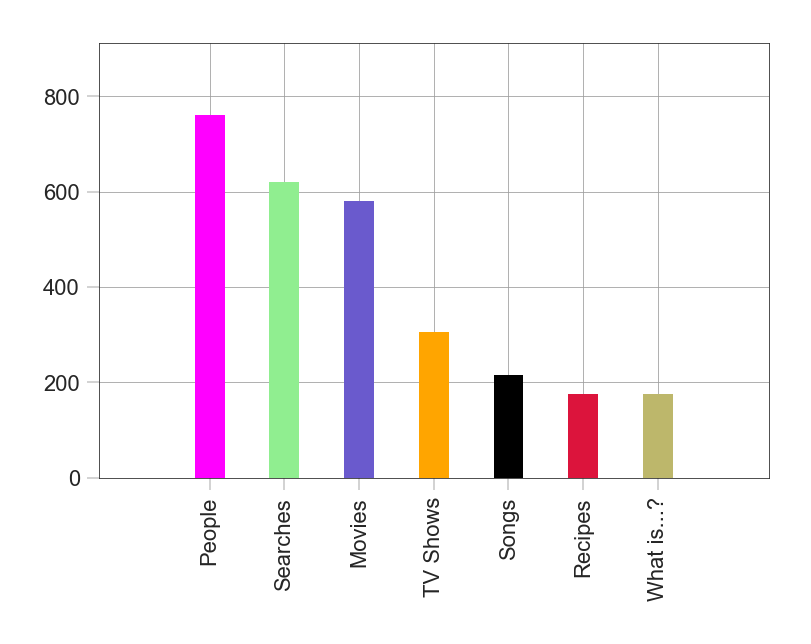

<Figure size 1080x7200 with 0 Axes>

In [22]:

x,y = zip(*top_cat)

ctw = df.set_index('category').to_dict()['color']

fig, ax = plt.subplots()

ax.bar(x,y,color=[ctw[i] for i in x], width=0.4)
xtick_loc = [0.50, 0.5, 0.50,0.5,0.5,0.50, 0.5]
ax.xaxis.set_ticklabels(x, rotation='vertical')
ax.margins(0.2)
plt.figure(figsize=(15,100))




In [25]:
from PIL import Image
cloud = np.array(Image.open("cloud.png"))

In [30]:
# makes the circle using numpy
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

In [31]:
import wordcloud

df.drop_duplicates(subset=['query'])

#create a dict of colors and category
color_to_words =df.groupby('color')['query'].agg(list).to_dict()

# print('Donald Trump' in color_to_words['cyan'])
#Creating the text variable
word_ls = df["query"]


word_cloud_dict = Counter(word_ls)

# Creating word_cloud with text as argument in .generate() method
wordcloud = wordcloud.WordCloud(mask=cloud, width = mask.shape[1],
               height = mask.shape[0],max_words = 1000,
               max_font_size = 500,
               random_state = 42, background_color="white").generate_from_frequencies(word_cloud_dict)

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

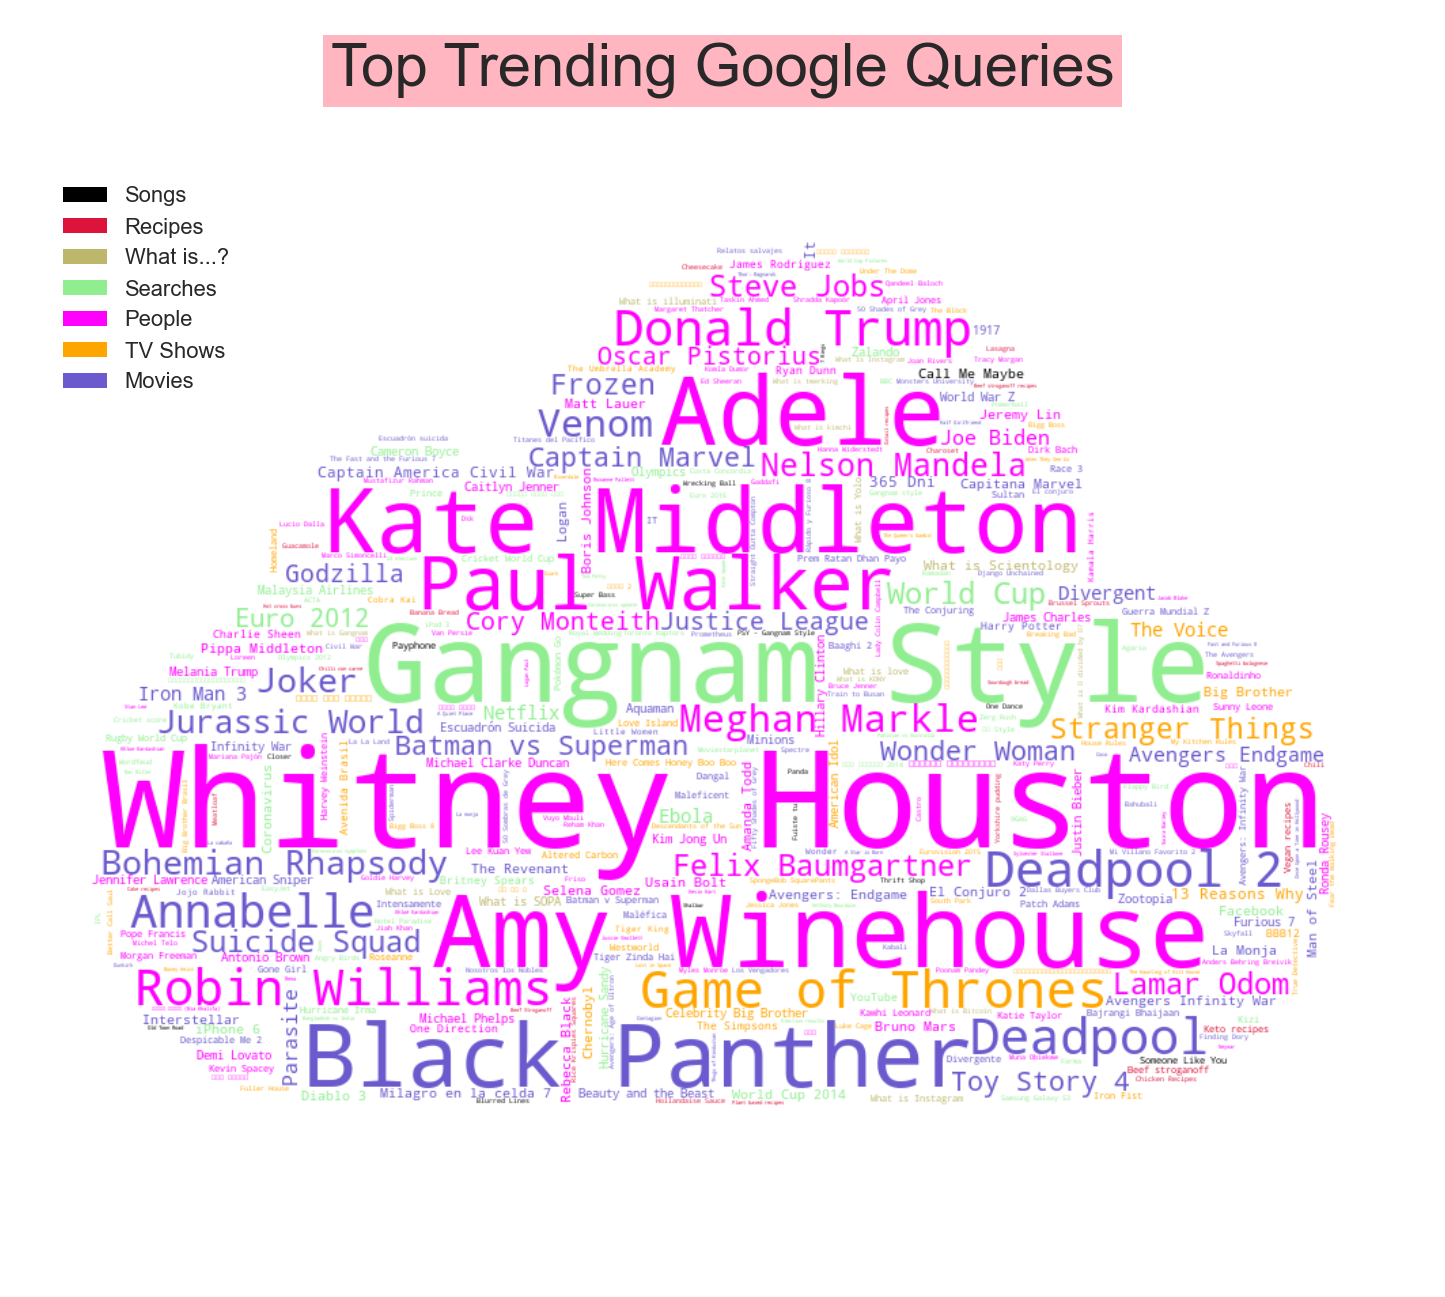

In [33]:
import matplotlib.patches as mpatches

ctw = df.set_index('color').to_dict()['query']

# Create a color function with single tone
grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

wordcloud.recolor(color_func=grouped_color_func)
# Display the generated Word Cloud
plt.figure(figsize=(15,10))
#add legend
categories = df.groupby('color')['category'].agg('first').to_dict()
patches = [mpatches.Patch(color=k, label=v) for k,v in categories.items()]
plt.legend(handles=patches, loc = 'upper left', ncol=1)

# Apply our color function
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Trending Google Queries",  fontsize = 30, pad=40, backgroundcolor="lightpink")
plt.margins()
plt.savefig("final.jpeg", format="jpeg")


In [35]:
top_search=Counter(df["query"]).most_common(1000)
c = df.set_index('query').to_dict()['color']
# print(c)
f = []
w = []
d = {}
for i in top_search:
    word, freq = i
    w.append(word)
    f.append(freq)
    d[word] = freq


In [37]:

x,y = zip(*top_cat)
n={}
for i in range(len(x)):
    n[x[i]] = i+1
print(n)
data = df[df['query'].isin(w)]
data['freq'] = data['query'].map(d)
data['category_no'] = data['category'].map(n)
data['weight'] = 10 - data['rank']
data

{'People': 1, 'Searches': 2, 'Movies': 3, 'TV Shows': 4, 'Songs': 5, 'Recipes': 6, 'What is...?': 7}


<ipython-input-37-6e92cbca4ad7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['freq'] = data['query'].map(d)
<ipython-input-37-6e92cbca4ad7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_no'] = data['category'].map(n)
<ipython-input-37-6e92cbca4ad7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,location,year,category,rank,query,category_freq,color,freq,category_no,weight
10,Global,2001,Movies,1,Harry Potter,580,slateblue,3,3,9
11,Global,2001,Movies,2,Lord of the Rings,580,slateblue,1,3,8
12,Global,2001,Movies,3,Final Fantasy,580,slateblue,1,3,7
13,Global,2001,Movies,4,Tomb Raider,580,slateblue,1,3,6
14,Global,2001,Movies,5,Shrek,580,slateblue,1,3,5
...,...,...,...,...,...,...,...,...,...,...
26807,United States,2020,TV Shows,3,Ozark,305,orange,2,4,7
26808,United States,2020,TV Shows,4,The Umbrella Academy,305,orange,3,4,6
26809,United States,2020,TV Shows,5,The Queen's Gambit,305,orange,2,4,5
26847,United States,2020,Movies,3,365 Dni,580,slateblue,6,3,7


In [38]:
df_avg = data.sort_values(['category_no','query'])
df_avg["query_id"] = np.arange(len(df_avg)) + 1
df_avg["query_mod"] =  df_avg["query_id"] + (10*df_avg["category_no"])
df_avg = df_avg.assign(
    avg = df_avg.groupby("category")["freq"].transform("mean"),
    mid = df_avg.groupby("category")["query_mod"].transform("mean")
)

df_avg

,location,year,category,rank,query,category_freq,color,freq,category_no,weight,query_id,query_mod,avg,mid
3134,Austria,2012,People,5,Adam Sandler,760,magenta,1,1,5,1,11,6.95,310.00
2105,Australia,2011,People,1,Adele,760,magenta,19,1,9,2,12,6.95,310.00
2148,Belgium,2011,People,4,Adele,760,magenta,19,1,6,3,13,6.95,310.00
2225,Czechia,2011,People,1,Adele,760,magenta,19,1,9,4,14,6.95,310.00
2240,Denmark,2011,People,1,Adele,760,magenta,19,1,9,5,15,6.95,310.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,Kenya,2012,What is...?,2,What is sex,175,darkkhaki,1,7,8,2010,2080,1.70,2030.00
3934,Kenya,2012,What is...?,5,What is teaching,175,darkkhaki,1,7,5,2011,2081,1.70,2030.00
4786,Uganda,2012,What is...?,2,What is technology,175,darkkhaki,1,7,8,2012,2082,1.70,2030.00
6040,Ireland,2013,What is...?,1,What is twerking,175,darkkhaki,2,7,9,2013,2083,1.70,2030.00


In [39]:
df_lines = df_avg.groupby("category_no").agg(
    start_x = ("query_mod", 'min'),
    end_x = ("query_mod", 'max'),
    y = ("avg", 'mean') # All values are the same, we could have used min, max, etc.
).reset_index()

# This extends the horizontal lines a little on each direction.
df_lines["start_x"] -= 5
df_lines["end_x"] += 5

df_lines = pd.melt(
    df_lines, 
    id_vars=["category_no", "y"], 
    value_vars=["start_x", "end_x"], 
    var_name="type", 
    value_name="x"
)
df_lines["x_group"] = np.where(df_lines["type"] == "start_x", df_lines["x"] + 0.1, df_lines["x"] - 0.1)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "start_x").values & (df_lines["x"] == np.min(df_lines["x"])).values, 
    df_lines["x_group"] - 0.1, 
    df_lines["x_group"]
)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "end_x").values & (df_lines["x"] == np.max(df_lines["x"])).values, 
    df_lines["x_group"] + 0.1, 
    df_lines["x_group"]
)
df_lines = df_lines.sort_values(["category_no", "x_group"])

In [40]:
import matplotlib.colors as mc
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as image

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])
# Misc colors
GREY82 = "#d1d1d1"
GREY70 = "#B3B3B3"
GREY40 = "#666666"
GREY30 = "#4d4d4d"
BG_WHITE = "#fafaf5"

# These colors (and their dark and light variant) are assigned to each of the 9 seasons
COLORS = ["#486090", "#D7BFA6", "#6078A8", "#9CCCCC", "#7890A8","#C7B0C1", "#B5C9C9", "#90A8C0", "#A8A890"]
COLORS_DARK = [adjust_lightness(color, 0.8) for color in COLORS]
COLORS_LIGHT = [adjust_lightness(color, 1.2) for color in COLORS]

# Three colormaps with three variants
cmap_regular = mc.LinearSegmentedColormap.from_list("regular", COLORS)
cmap_dark = mc.LinearSegmentedColormap.from_list("dark", COLORS_DARK)
cmap_light = mc.LinearSegmentedColormap.from_list("light", COLORS_LIGHT)

# Function used to normalize season values into 0-1 scale.
normalize = mc.Normalize(vmin=1, vmax=9)


# Horizontal lines
HLINES = [6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

In [41]:
VOTES_MAX = df_avg["weight"].max()
VOTES_MIN = df_avg["weight"].min()

# low and high refer to the final dot size.
def scale_to_interval(x, low=15, high=150):
    return ((x - VOTES_MIN) / (VOTES_MAX - VOTES_MIN)) * (high - low) + low

([<matplotlib.axis.YTick at 0x7fc0f06b7880>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Special Elite'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Special Elite'] not found. Falling back to DejaVu Sans.


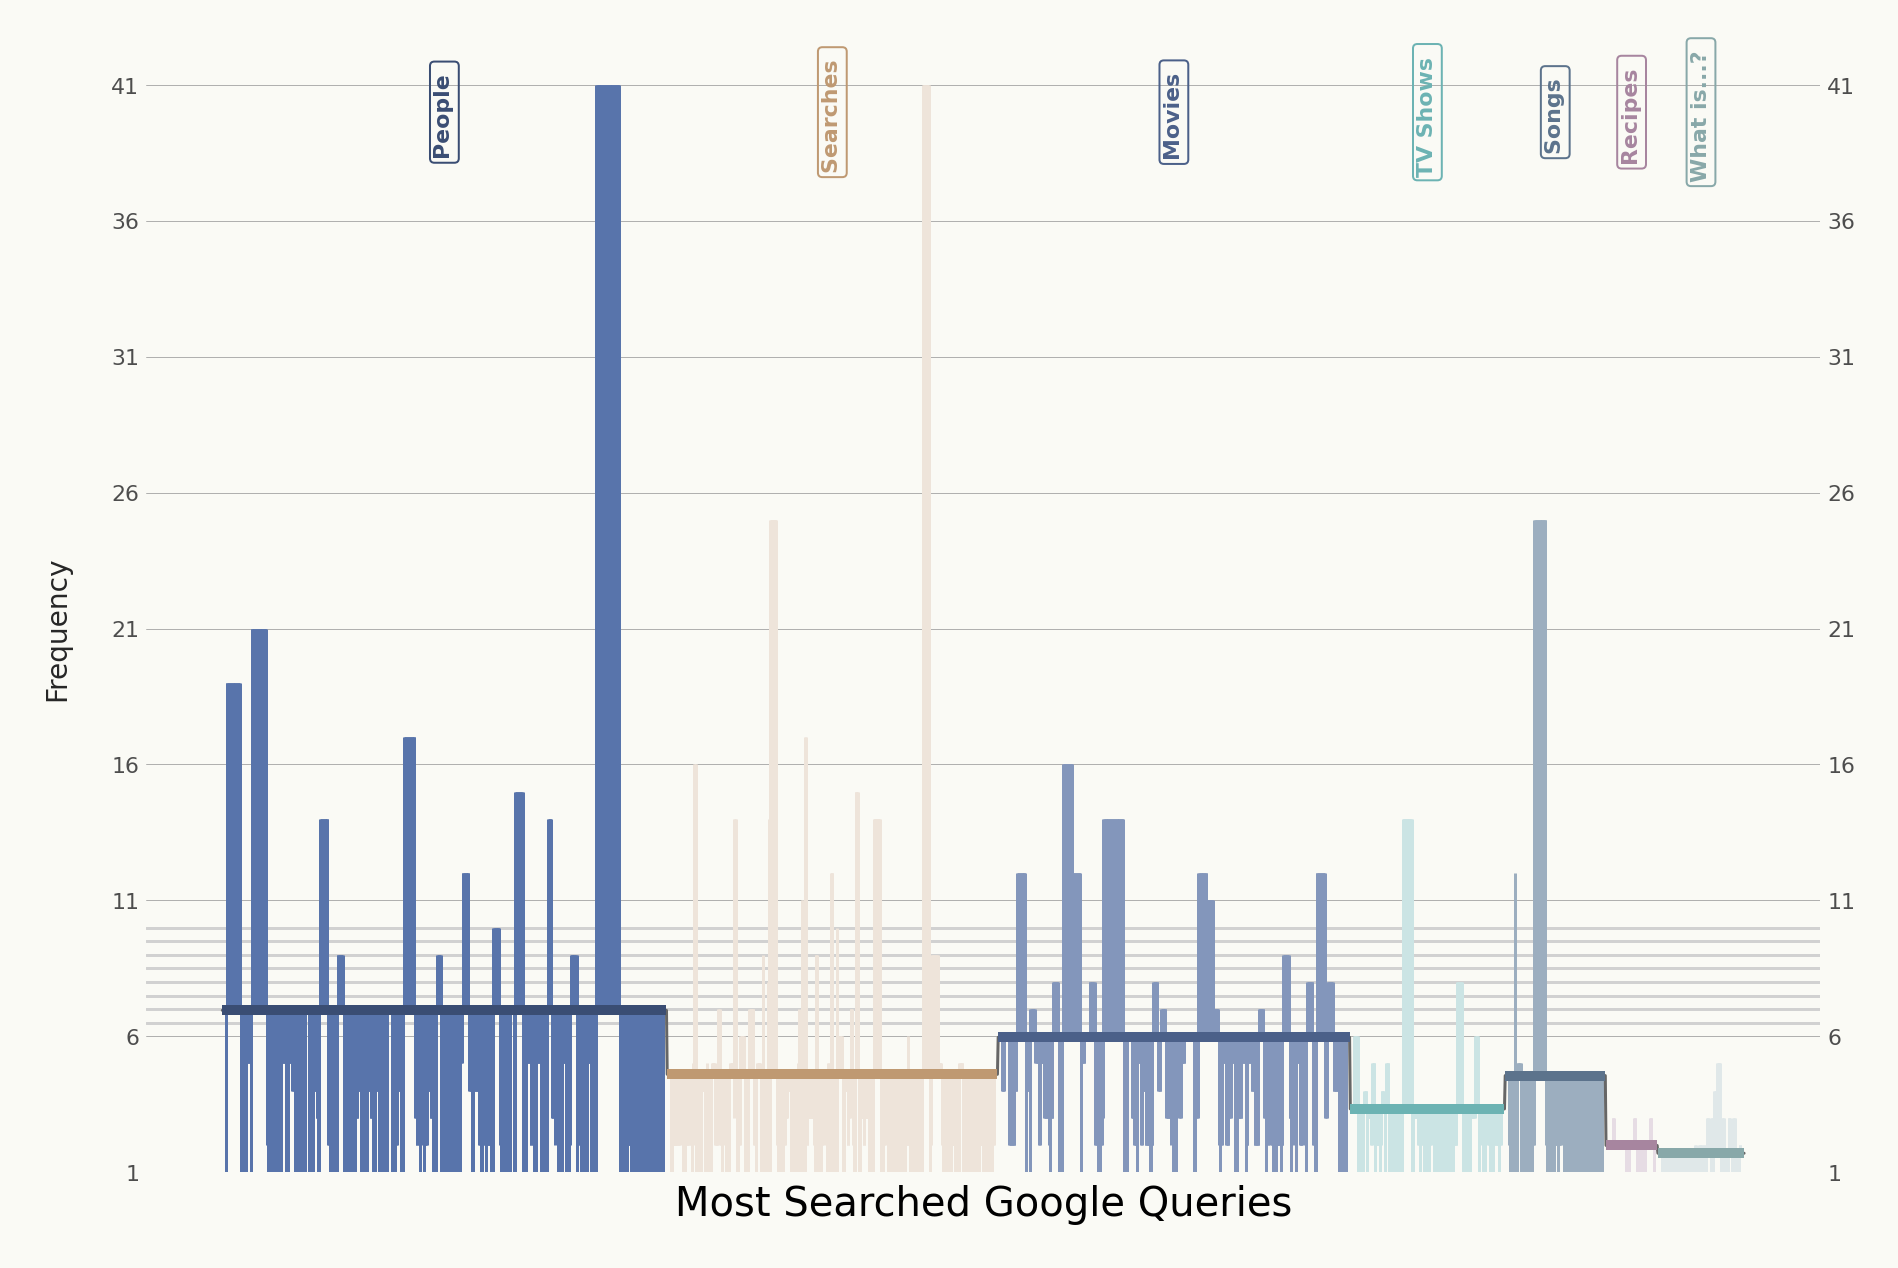

In [42]:
fig, ax = plt.subplots(figsize = (15, 10))


# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# First, horizontal lines that are used as scale reference
# zorder=0 to keep them in the background
for h in HLINES:
    plt.axhline(h, color=GREY82, zorder=0)

     
# Add vertical segments ------------------------------------------
# Vertical segments. 
# These represent the queries
plt.vlines(
    x="query_mod", 
    ymin="freq", 
    ymax="avg",
    color=cmap_light(normalize(df_avg["category_no"])),
    data = df_avg
)


# Add horizontal segments ----------------------------------------
# A grey line that connects mean values
# The third argument is the format string, either empty or "-"
plt.plot("x", "y", "-", color=GREY40, data=df_lines)

# These represent the mean rating per category. 
for cat in df_lines["category_no"].unique():
    d = df_lines[df_lines["category_no"] == cat]
    plt.plot("x_group", "y", "", color=cmap_dark(normalize(cat)), lw=5, data=d, solid_capstyle="butt")

    
# Add dots ------------------------------------------------------- 
# The dots indicate each episode's rating, with its size given by the 
# number of votes.
# plt.scatter(
#     "query_mod", 
#     "weight",
#     s = scale_to_interval(df_avg["weight"]),
#     color=cmap_regular(normalize(df_avg["category_no"])), 
#     data=df_avg,
#     zorder= 1
# )

m = {1:'People', 2:'Searches', 3:'Movies', 4:'TV Shows', 5:'Songs', 6:'Recipes', 7:'What is...?'}
# Add labels -----------------------------------------------------
# They indicate the season and free us from using a legend.
midpoints = df_avg["mid"].unique()
for cat, mid in enumerate(midpoints):
    color = cmap_dark(normalize(cat + 1))
    i = cat+1
    plt.text(
        mid, 40, f"{m[i]} ", 
        color=color,
        weight="bold",
        ha="center",
        va="center",
        rotation='vertical',
        fontname="Special Elite",
        fontsize=11,
        bbox=dict(
            facecolor="none", 
            edgecolor=color, 
            linewidth=1,
            boxstyle="round", 
            pad=0.2
        )
    )


# Customize layout -----------------------------------------------
    
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["left"].set_color("none")

# Customize y ticks
# * Remove y axis ticks 
# * Put labels on both right and left sides
plt.tick_params(axis="y", labelright=True, length=0)
plt.yticks(HLINES, fontname="Roboto Mono", fontsize=11, color=GREY30)
plt.ylim(0.98 * 6.5, 10.2 * 1.02)

# Remove ticks and legends
plt.xticks([], "")

# Y label
plt.ylabel("Frequency", fontname="Roboto Mono", fontsize=14)

# Add caption
plt.text(
    0.5, -0.03, "Most Searched Google Queries", 
    fontname="Special Elite", 
    fontsize=20, 
    color='black',
    ha="center", 
    va="center", 
    transform=ax.transAxes # so coordinates are in terms of the axis.
)

# Create annotation box to place image.
# It will be added at (1, 6.75) in data coordinates.
# ab = AnnotationBbox(
#     OffsetImage(IMAGE, zoom=0.2), 
#     (1, 6.75), 
#     xycoords="data", 
#     box_alignment=(0, 0.5),
#     pad=0, 
#     frameon=False
# )

# # Add the annotation box into the axis
# ax.add_artist(ab)





# Add custom legend ----------------------------------------------

# We create a horizontal legend from scratch so this plot looks as 
# much as possible like the original.

# Horizontal position for the dots and their labels
x_pos = [0.44, 0.48, 0.52, 0.56,0.60,0.64,0.68]
votes = [2000, 4000, 6000, 8000,10000,12000,14000]

# Dots are in term of the (0, 1) coordinate system of the axis.
# plt.scatter(
#     x_pos, 
#     [0.065] * 7, 
#     s=scale_to_interval(np.array(votes)), 
#     color="black",
#     transform=ax.transAxes
# )

# Add title to our custom legend
# plt.text(0.5, 0.0875, "Weight", fontname="Roboto Mono", fontsize=10, ha="center", transform=ax.transAxes)

# Place legends below the legend markers
# for (xpos, vote) in zip(x_pos, votes):
#     plt.text(xpos, 0.035,  f"{vote}", fontname="Roboto Mono", fontsize=9, ha="center", transform=ax.transAxes)

plt.yticks(np.arange(min(df_avg['freq']), max(df_avg['freq'])+1, 5))
# # Now save the plot!
# plt.savefig(
#     "the-office-lollipop.png", 
#     dpi=300,
#     bbox_inches="tight",
#     pad_inches=0.3
# )


##### 